### MEMTIER

In [4]:
import numpy as np

In [16]:
filesW8 = []
filesW16 = []
filesW32 = []
filesW64 = []
files = []

path = "/home/andrea/Desktop/Get/"
for vm in range(1, 2):
    for instance in range(1, 3):
        for rep in range(1, 4):
            for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 105]:
                filesW8.append((path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/Get_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'.log'))

                filesW16.append((path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/Get_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'.log'))

                filesW32.append((path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/Get_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'.log'))
                filesW64.append((path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/Get_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'.log'))


files.append(filesW8)
files.append(filesW16)
files.append(filesW32)
files.append(filesW64)

In [17]:
results = [[[0 for x in range(8)] for y in range(0, 13)] for z in range(0, 4)] 
for worker in range(1, 5):
    f = 0
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 105]:
        throughput = np.zeros(3)
        latency = np.zeros(3)
        for rep in range(1, 4):
            arrayFileDaAprire = []
            
            for vm in range(1, 2):
                for instance in range(1, 3):
                    arrayFileDaAprire.append([z for z in files[worker-1] if z == path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/Get_C'+str(clients)+'_T1'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'.log'])

            for j in range(0, len(arrayFileDaAprire)):
                fileI = open(arrayFileDaAprire[j][0], "r")
                linesI = []
                for line in fileI:
                    linesI.append(line)

                xI = np.asarray(linesI)
                
                
                countI = 0
                i = 2
                while xI[i] != "ALL STATS\n":
                    countI += 1
                    i += 1

                i += 7  #4 per set, 5 per get, 7 per 50%50
                z = xI[i][6:]
                m = 0
                numbers = 0
                singleLatency = ""
                singleThroughput = ""
                while numbers < 3:
                    while z[m] == " ":
                        m += 1
                    while z[m] != " ":
                        if numbers == 0:
                            singleThroughput += z[m]
                        m += 1 
                    numbers += 1
                while z[m] == " ":
                        m += 1
                while z[m] != " ":
                    singleLatency += z[m]
                    m += 1

                latency[rep-1] += float(singleLatency)
                throughput[rep-1] += float(singleThroughput)
                
            latency[rep-1] = latency[rep-1] / len(arrayFileDaAprire)
        

        results[worker-1][f][0] = clients
        results[worker-1][f][1] = 1
        results[worker-1][f][2] = throughput[0]
        results[worker-1][f][3] = throughput[1]
        results[worker-1][f][4] = throughput[2]
        results[worker-1][f][5] = latency[0]
        results[worker-1][f][6] = latency[1]
        results[worker-1][f][7] = latency[2]
        f += 1

In [18]:
fileOutput = open(path+"resultsMemtier.txt", "w")

In [19]:
for j in range(len(results)):
    fileOutput.write("Worker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(results[0])):         
        fileOutput.write("\nClients: ")
        fileOutput.write(str(int(results[j][h][0])))
        fileOutput.write("\tThreads: ")
        fileOutput.write(str(int(results[j][h][1])))
        fileOutput.write('\nThroughput: ')
        fileOutput.write(str(results[j][h][2])+ " " + str(results[j][h][3]) + " " + str(results[j][h][4]))
        fileOutput.write('\nLatency: ')
        fileOutput.write(str(results[j][h][5]) +" " + str(results[j][h][6]) + " " + str(results[j][h][7]))
        fileOutput.write('\n')

    fileOutput.write('\n\n')

fileOutput.close()

In [5]:
numOfRepetitions = 3
numOfClients = np.zeros(13) 


throughputFinal = [[0 for x in range(13)] for y in range(4)]
errThroughputFinal = [[0 for x in range(13)] for y in range(4)]
latencyFinal = [[0 for x in range(13)] for y in range(4)]
errLatencyFinal = [[0 for x in range(13)] for y in range(4)]

file = open("/home/andrea/Desktop/Final/Baseline3Second/3.2/Get/resultsMW.txt")

worker = 0
lines = []
for line in file:
    lines.append(line)
x = np.asarray(lines)
j = 0
while j < len(x):
    i = 2
    index = 0
    
    throughput = np.zeros((13, numOfRepetitions)) 
    errThroughput = np.zeros(13) 
    latency = np.zeros((13, numOfRepetitions))
    errLatency = np.zeros(13)
        
    while i < ((len(x) / 4)-1):
        clients = int(x[j+i].split("\t")[0].split(" ")[1]) * int(x[j+i].split("\t")[1].split(" ")[1])
        numOfClients[index] = clients
        
        #prendo i valori delle 3 ripetizioni e li metto in throughput 
        # (i.e. sommo i valori delle diverse VM a parità di ripetizione)
        throughput[index][0] = float(x[j+i+1].split()[1])
        throughput[index][1] = float(x[j+i+1].split()[2])
        throughput[index][2] = float(x[j+i+1].split()[3])

        latency[index][0] = float(x[j+i+2].split()[1])
        latency[index][1] = float(x[j+i+2].split()[2])
        latency[index][2] = float(x[j+i+2].split()[3])

        i += 4
        index += 1
    
    numOfClients = numOfClients.astype(dtype=int)

    errThroughput = np.std(throughput, axis = 1)
    errLatency = np.std(latency, axis = 1)

    throughput = np.mean(throughput, axis = 1)
    latency = np.mean(latency, axis = 1)

    throughputFinal[worker] = throughput
    latencyFinal[worker] = latency
    errThroughputFinal[worker] = errThroughput
    errLatencyFinal[worker] = errLatency
    
    j += i+1
    worker += 1

numOfClients = numOfClients * 2

In [22]:
import matplotlib.pyplot as plt

In [23]:
plt.figure(figsize=(35, 25))
plt.errorbar(numOfClients, throughputFinal[0], yerr=errThroughputFinal[0], fmt='-o',  linewidth=2.0, markersize = 5, label="8 Worker Threads", color="b", capsize=5)
plt.errorbar(numOfClients, throughputFinal[1], yerr=errThroughputFinal[1], fmt='-o',  linewidth=2.0, markersize = 5, label="16 Worker Threads", color="C3", capsize=5)
plt.errorbar(numOfClients, throughputFinal[2], yerr=errThroughputFinal[2], fmt='-o',  linewidth=2.0, markersize = 5, label="32 Worker Threads", color="g", capsize=5)
plt.errorbar(numOfClients, throughputFinal[3], yerr=errThroughputFinal[3], fmt='-o',  linewidth=2.0, markersize = 5, label="64 Worker Threads", color="C1", capsize=5)

plt.legend(loc=2, fontsize=30)
plt.title('Response Time Read-only with 1 client VM (2 instances), 2 MW and 1 server', fontsize= 35)
plt.xlabel("Number of Clients", fontsize= 30)
plt.ylabel("Response Time [msec]", fontsize= 30)
plt.rc('grid', linestyle="-.", color ='grey')
plt.grid(True)
plt.xticks(numOfClients)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.margins(x = 0.05, y = 0.05)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 11506.67856423818)

In [73]:
plt.savefig(path+"responseTimeMemtier.png")

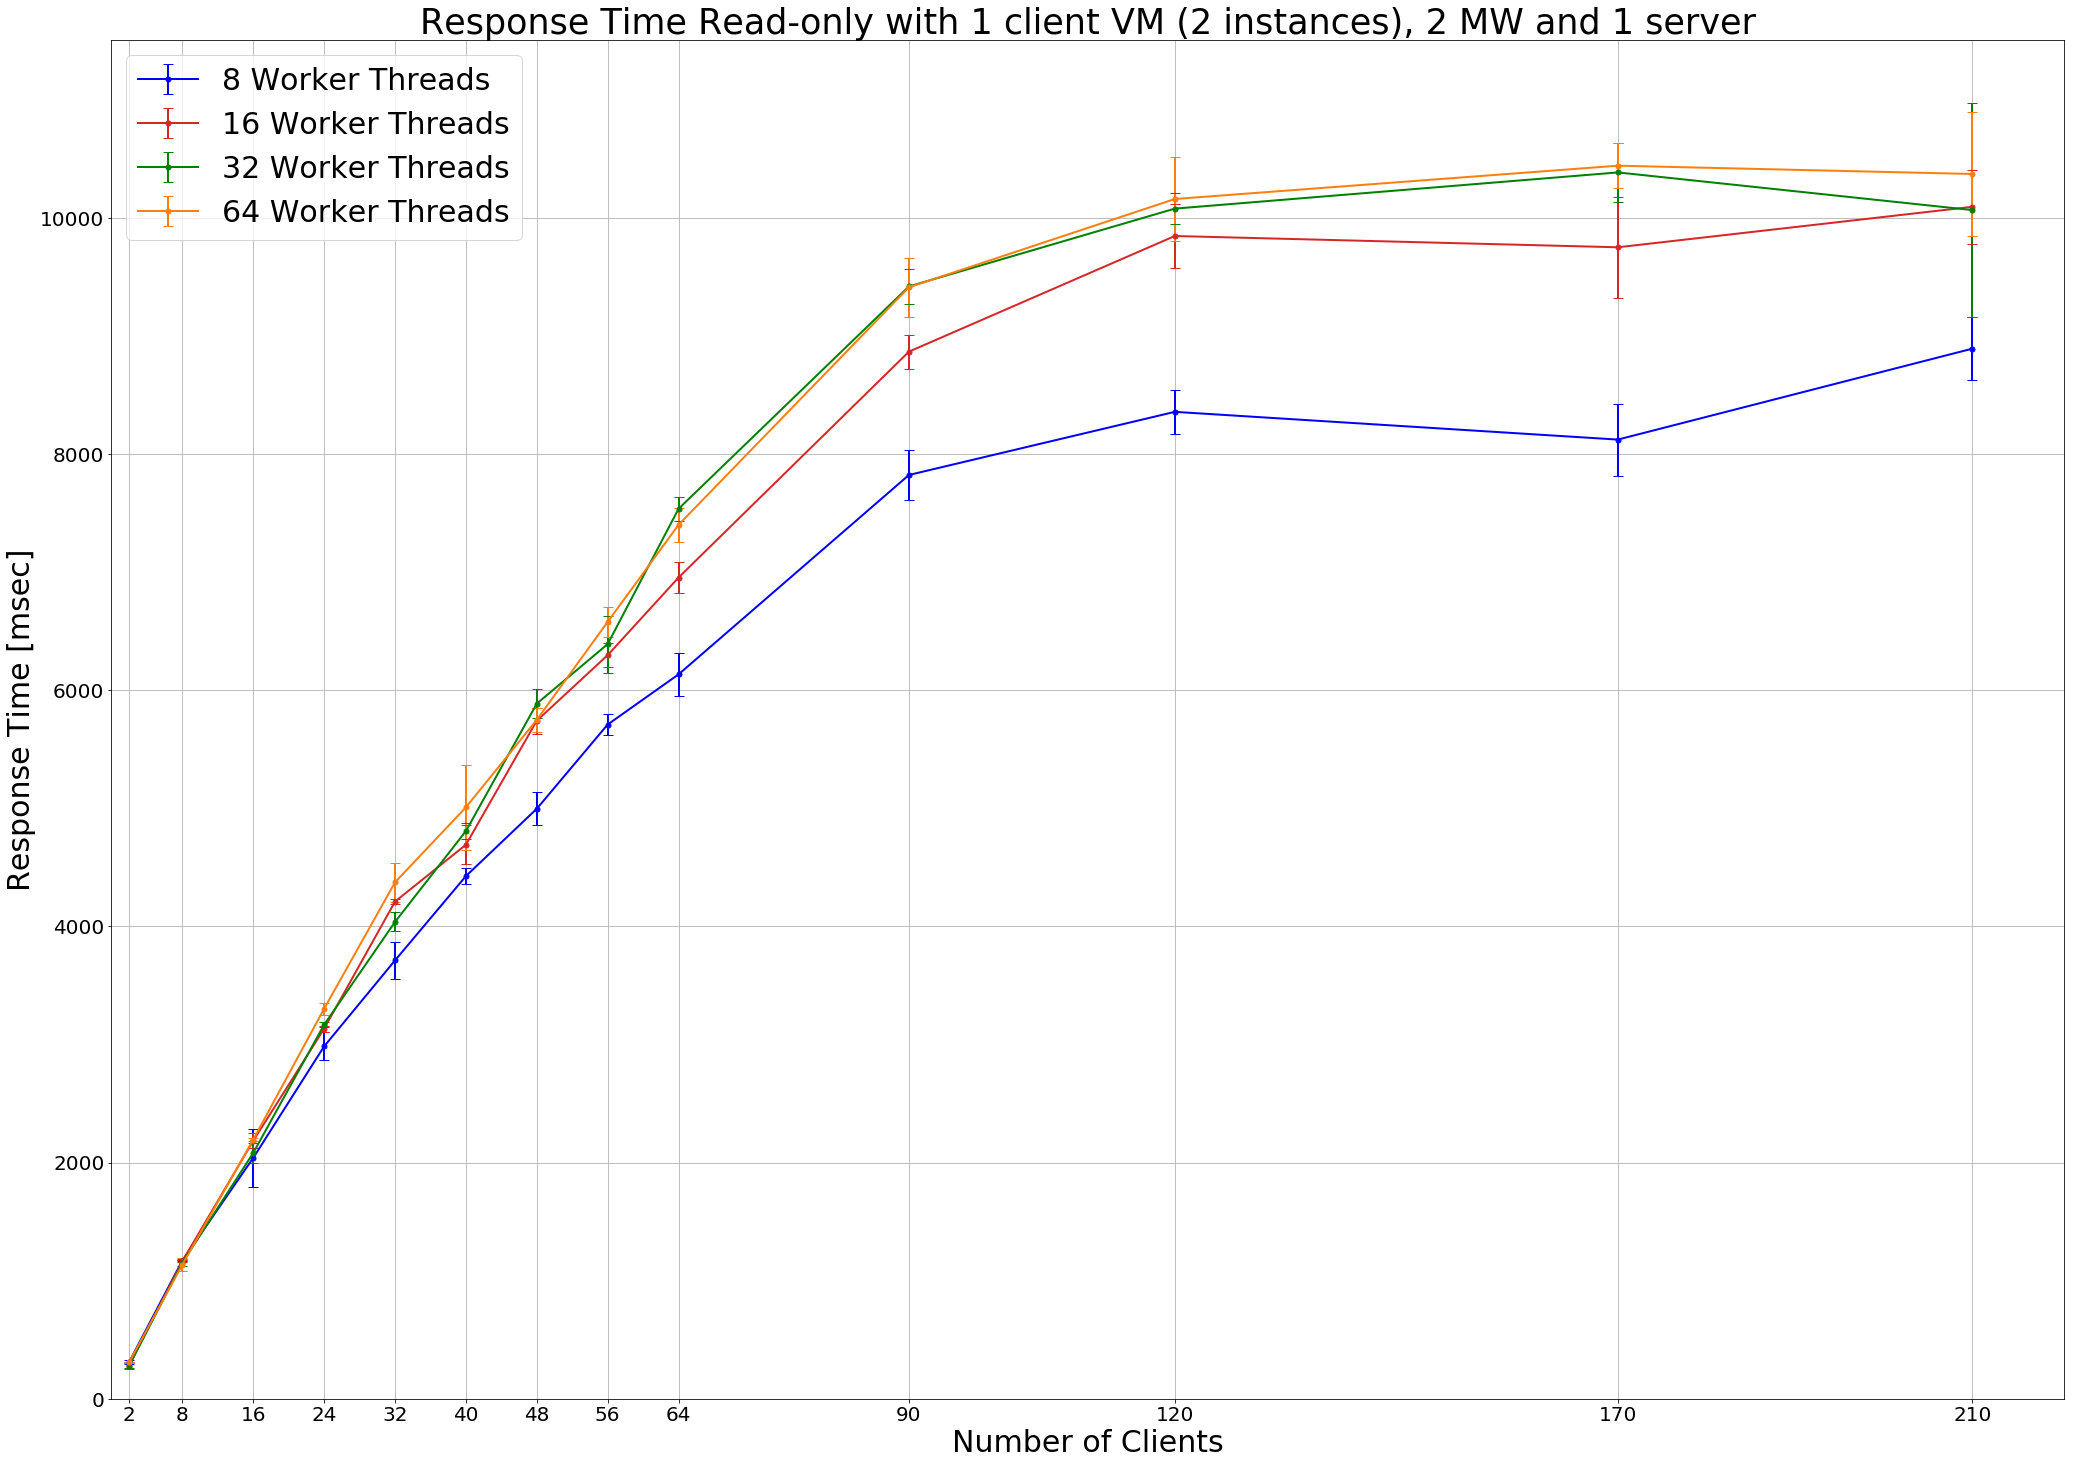

In [24]:
plt.show()

### MIDDLEWARE

In [29]:
import numpy as np
type = "Get"
path = "/home/andrea/Desktop/"+type+"/"

timesFiles = []
throughputFiles = []
throughputW8 = []
throughputW16 = []
throughputW32 = []
throughputW64 = []

timesW8 = []
timesW16 = []
timesW32 = []
timesW64= []

for rep in range(1, 4):
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 105]:
        throughputW8.append((path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'/Throughput.log'))
        throughputW8.append((path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'/Throughput.log'))

        timesW8.append((path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'/times.log'))
        timesW8.append((path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W8_R'+str(rep)+'/times.log'))

        throughputW16.append((path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'/Throughput.log'))
        throughputW16.append((path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'/Throughput.log'))

        timesW16.append((path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'/times.log'))
        timesW16.append((path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W16_R'+str(rep)+'/times.log'))

        throughputW32.append((path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'/Throughput.log'))
        throughputW32.append((path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'/Throughput.log'))

        timesW32.append((path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'/times.log'))
        timesW32.append((path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W32_R'+str(rep)+'/times.log'))

        throughputW64.append((path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'/Throughput.log'))
        throughputW64.append((path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'/Throughput.log'))

        timesW64.append((path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'/times.log'))
        timesW64.append((path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W64_R'+str(rep)+'/times.log'))
        
timesFiles.append(timesW8)
timesFiles.append(timesW16)
timesFiles.append(timesW32)
timesFiles.append(timesW64)

throughputFiles.append(throughputW8)
throughputFiles.append(throughputW16)
throughputFiles.append(throughputW32)
throughputFiles.append(throughputW64)

In [30]:
results = [[[0 for x in range(8)] for y in range(len(throughputW8)//6)] for z in range(0, 4)]
f = 0
for worker in range(1, 5):
    f = 0
    for clients in [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 105]:
        throughput = np.zeros(3)
        response = np.zeros(3)
        for rep in range(1, 4):
            i = 2
            count = 0
            
            arrayFileDaAprire = [z for z in throughputFiles[worker-1] if z == path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/Throughput.log']
            if len(arrayFileDaAprire) != 0:
                fileThroughput = open(arrayFileDaAprire[0], "r")
                linesThroughput = []
                for line in fileThroughput:
                    linesThroughput.append(float(line[:-1]))

                x = np.asarray(linesThroughput)
                throughput[rep-1] = np.mean(x[1:])


            fileThroughput2 = open([z for z in throughputFiles[worker-1] if z == path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/Throughput.log'][0], "r")
            linesThroughput2 = []
            for line in fileThroughput2:
                linesThroughput2.append(float(line[:-1]))

            x2 = np.asarray(linesThroughput2)
            throughput[rep-1] += np.mean(x2[1:])            
             
            countResponse1 = 0
            arrayFileDaAprire = [z for z in timesFiles[worker-1] if z == path+'MW4/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/times.log']
            if len(arrayFileDaAprire) != 0:
                fileResponse = open(arrayFileDaAprire[0], "r")
                linesResponse = []
                for line in fileResponse.readlines()[1:]:
                    if line != "null\n" and line != "\n":
                        linesResponse.append(line)

                for line in linesResponse:
                    response[rep-1] += float(line.split("\t")[-1][:-1])

                countResponse1 = len(linesResponse)
                
            fileResponse2 = open([z for z in timesFiles[worker-1] if z == path+'MW5/'+'rep'+str(rep)+'/'+type+'_C'+str(clients)+'_T1'+'_W'+str(2**(worker+2))+'_R'+str(rep)+'/times.log'][0], "r")
            linesResponse2 = []
            for line in fileResponse2.readlines()[1:]:
                if line != "null\n" and line != "\n":
                    linesResponse2.append(line)

            for line in linesResponse2:
                response[rep-1] += float(line.split("\t")[-1][:-1])
                
            countResponse2 = len(linesResponse2)
                
            response[rep-1] = response[rep-1] / ((countResponse1+countResponse2) * 1000000)
            
        results[worker-1][f][0] = clients
        results[worker-1][f][1] = 1
        results[worker-1][f][2] = throughput[0]
        results[worker-1][f][3] = throughput[1]
        results[worker-1][f][4] = throughput[2]
        results[worker-1][f][5] = response[0]
        results[worker-1][f][6] = response[1]
        results[worker-1][f][7] = response[2]
        f += 1

IndexError: list index out of range

In [18]:
fileOutput = open('/home/andrea/Desktop/'+type+'/resultsMW.txt', "w")

In [19]:
for j in range(len(results)):
    fileOutput.write("Worker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(results[0])):         
        fileOutput.write("\nClients: ")
        fileOutput.write(str(int(results[j][h][0])))
        fileOutput.write("\tThreads: ")
        fileOutput.write(str(int(results[j][h][1])))
        fileOutput.write('\nThroughput: ')
        fileOutput.write(str(results[j][h][2])+ " " + str(results[j][h][3]) + " " + str(results[j][h][4]))
        fileOutput.write('\nLatency: ')
        fileOutput.write(str(results[j][h][5]) +" " + str(results[j][h][6]) + " " + str(results[j][h][7]))
        fileOutput.write('\n')

    fileOutput.write('\n\n')

fileOutput.close()

In [23]:
import numpy as np

numOfRepetitions = 3
numOfClients = np.zeros(13) 
type = "Get"
throughputFinal = [[0 for x in range(13)] for y in range(4)]
errThroughputFinal = [[0 for x in range(13)] for y in range(4)]
latencyFinal = [[0 for x in range(13)] for y in range(4)]
errLatencyFinal = [[0 for x in range(13)] for y in range(4)]

file = open('/home/andrea/Desktop/Final/Baseline3Second/3.2/'+str(type)+'/resultsMW.txt')

worker = 0
lines = []
for line in file:
    lines.append(line)
x = np.asarray(lines)
j = 0
while j < len(x):
    i = 2
    index = 0
    
    throughput = np.zeros((13, numOfRepetitions)) 
    errThroughput = np.zeros(13) 
    latency = np.zeros((13, numOfRepetitions))
    errLatency = np.zeros(13)
        
    while i < ((len(x) / 4)-1):
        clients = int(x[j+i].split("\t")[0].split(" ")[1]) * int(x[j+i].split("\t")[1].split(" ")[1])
        numOfClients[index] = clients
        
        throughput[index][0] = float(x[j+i+1].split()[1])
        throughput[index][1] = float(x[j+i+1].split()[2])
        throughput[index][2] = float(x[j+i+1].split()[3])

        latency[index][0] = float(x[j+i+2].split()[1])
        latency[index][1] = float(x[j+i+2].split()[2])
        latency[index][2] = float(x[j+i+2].split()[3])

        i += 4
        index += 1
    
    numOfClients = numOfClients.astype(dtype=int)

    errThroughput = np.std(throughput, axis = 1)
    errLatency = np.std(latency, axis = 1)

    throughput = np.mean(throughput, axis = 1)
    latency = np.mean(latency, axis = 1)

    throughputFinal[worker] = throughput
    latencyFinal[worker] = latency
    errThroughputFinal[worker] = errThroughput
    errLatencyFinal[worker] = errLatency
    
    j += i+1
    worker += 1

numOfClients = numOfClients * 2

In [5]:
latencyMW = np.zeros(4)
for j in range(0, len(latencyFinal)):
    latencyMW[j] = latencyFinal[j][-1]-latencyFinal[j][0]

In [7]:
latencyMemtier = np.zeros(4)
for j in range(0, len(latencyFinal)):
    latencyMemtier[j] = latencyFinal[j][-1]-latencyFinal[j][0]

In [12]:
np.abs(latencyMemtier - latencyMW)*100/latencyMemtier

array([  9.02509044,  18.80295704,  34.7035381 ,  43.3008376 ])

In [3]:
import matplotlib.pyplot as plt

In [42]:
plt.figure(figsize=(27, 20))
plt.errorbar(numOfClients, latencyFinal[0], yerr=errLatencyFinal[0], fmt='-o', markersize = 10,  linewidth=2.0,  label="8 Worker Threads", color="b", capsize=7)
plt.errorbar(numOfClients, latencyFinal[1], yerr=errLatencyFinal[1], fmt='-o', markersize = 10, linewidth=2.0,  label="16 Worker Threads", color="C3", capsize=7)
plt.errorbar(numOfClients, latencyFinal[2], yerr=errLatencyFinal[2], fmt='-o', markersize = 10, linewidth=2.0,  label="32 Worker Threads", color="g", capsize=7)
plt.errorbar(numOfClients, latencyFinal[3], yerr=errLatencyFinal[3], fmt='-o', markersize = 10, linewidth=2.0, label="64 Worker Threads", color="C1", capsize=7)

plt.legend(loc=2, fontsize=30)
plt.title('Response Time Read-only with 1 client VM (2 instances), 2 MW and 1 server', fontsize= 35)
plt.xlabel("Number of Clients", fontsize= 30)
plt.ylabel("Response Time [msec]", fontsize= 30)
plt.rc('grid', linestyle="-.", color ='grey')
plt.grid(True)
plt.xticks(numOfClients)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.margins(x = 0.05, y = 0.05)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 31.849858410000468)

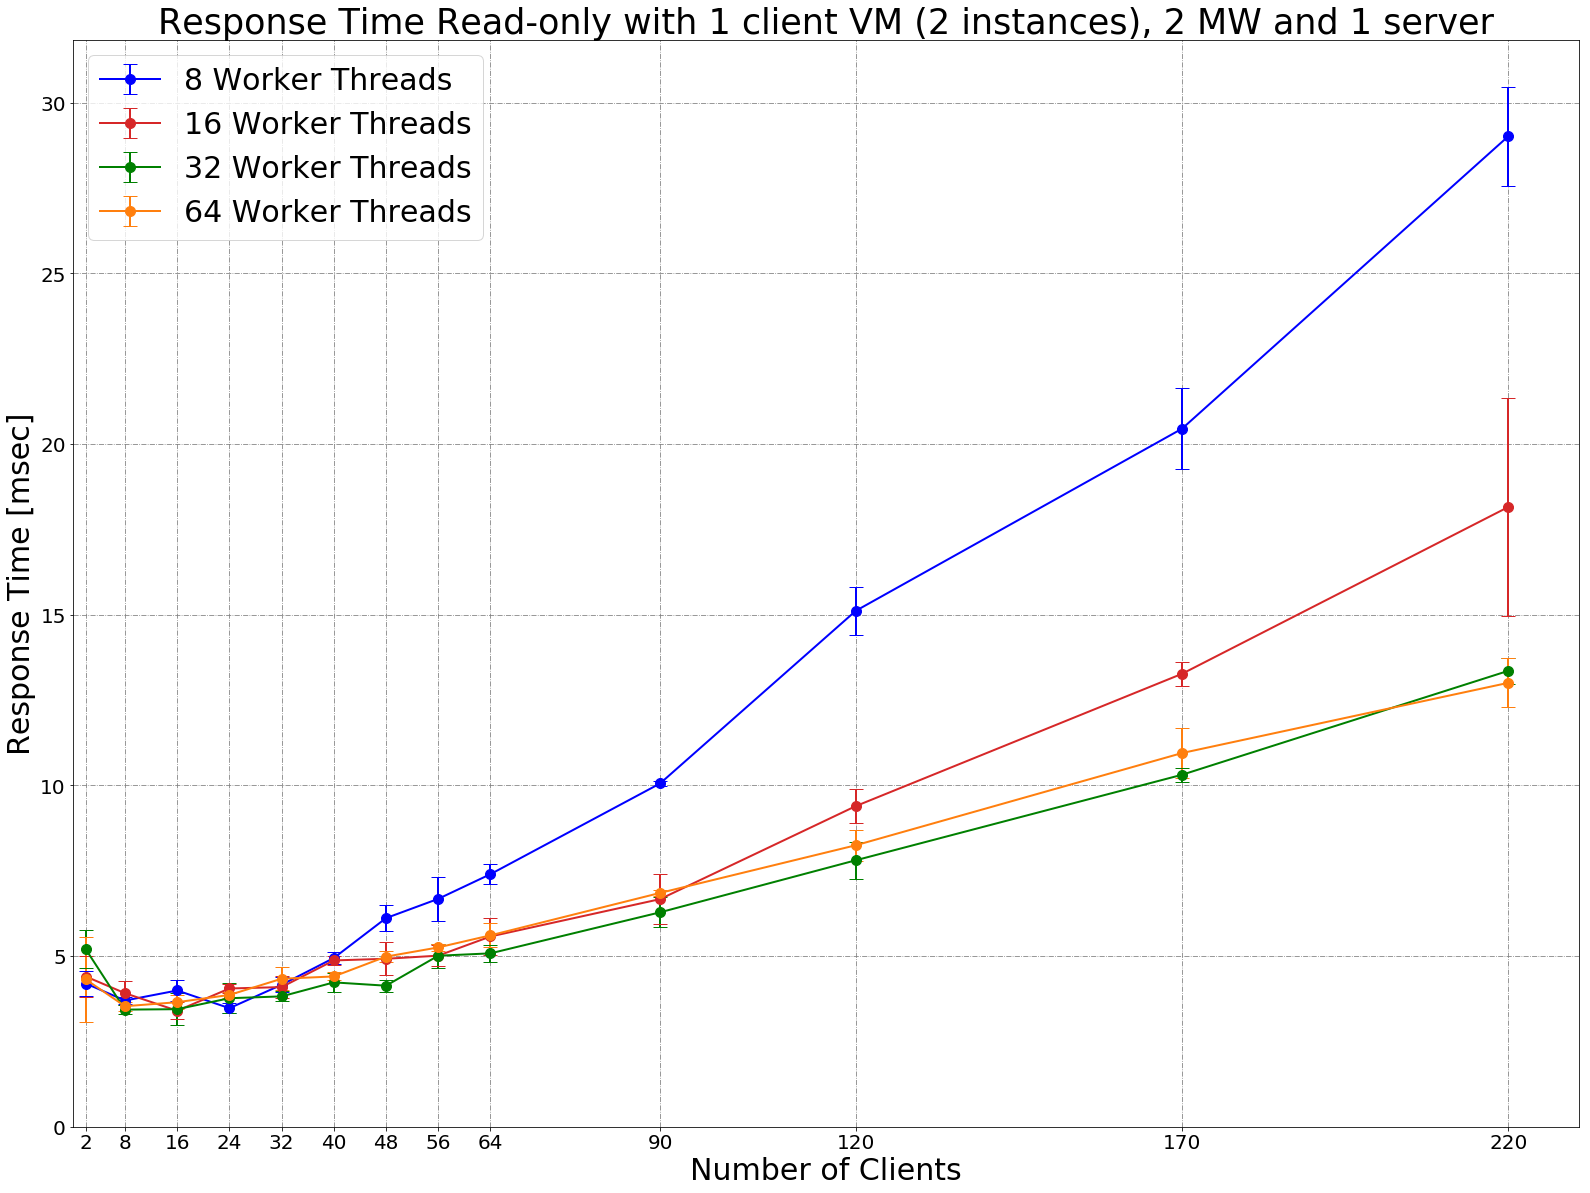

In [39]:
plt.show()

In [43]:
plt.savefig("/home/andrea/Desktop/Final/Baseline3Second/3.2/"+type+"/responseTimeMW.png")